## Imports:

In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import cv2
import tensorflow as tf
import csv

from keras.layers import *
from keras.models import *
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.utils import shuffle

%matplotlib inline

## Loading Data:

In [14]:
# Load pickled data
training_file = 'datasets/train.p'
validation_file='datasets/valid.p'
testing_file = 'datasets/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

## Dataset Summary & Exploration:

In [16]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory Visualization of the Dataset:

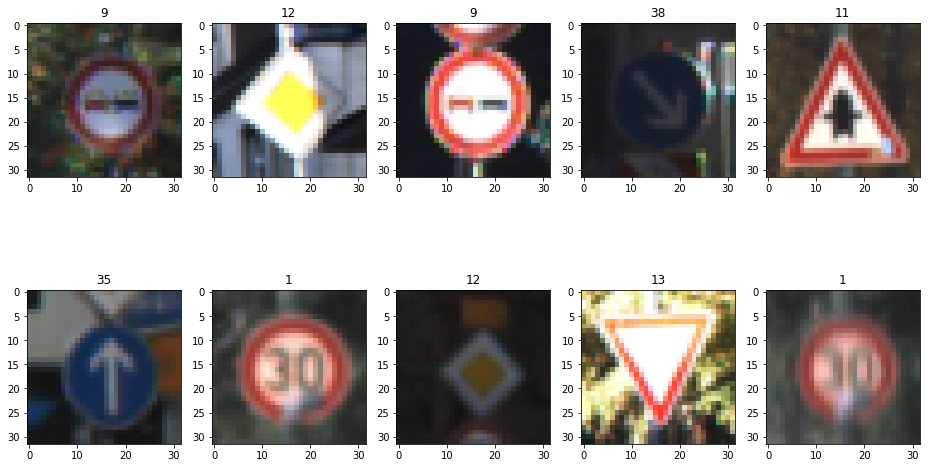

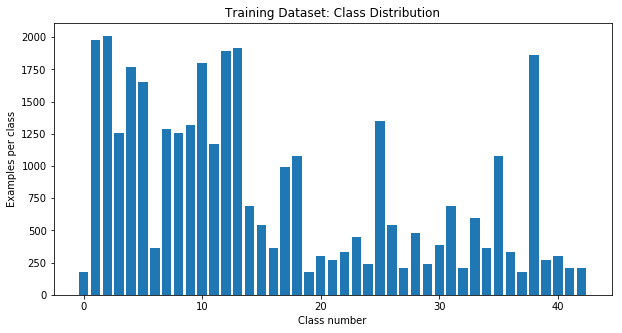

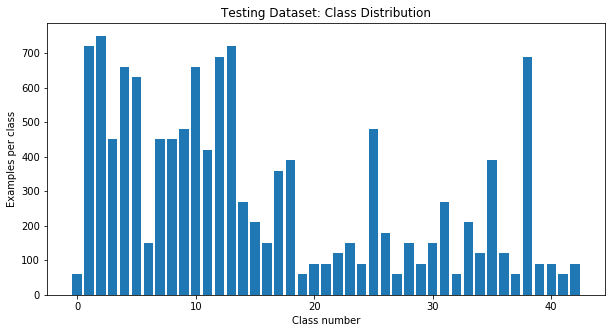

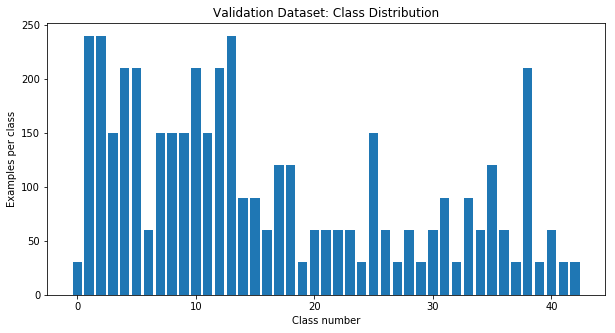

In [17]:
#Assess the images, get an idea of what preprocessing techniques could be used.
plt.figure(figsize=[16, 9])

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(str(y_train[i]))

#Show the distribution of the Training dataset.
plt.figure(figsize=(10, 5))
examples_per_class = np.bincount(y_train)
num_classes = len(examples_per_class)
plt.bar(np.arange(num_classes), examples_per_class)
plt.xlabel('Class number')
plt.ylabel('Examples per class')
plt.title('Training Dataset: Class Distribution')
plt.show()   

#Show the distribution of the Testing dataset.
plt.figure(figsize=(10, 5))
examples_per_class = np.bincount(y_test)
num_classes = len(examples_per_class)
plt.bar(np.arange(num_classes), examples_per_class)
plt.xlabel('Class number')
plt.ylabel('Examples per class')
plt.title('Testing Dataset: Class Distribution')
plt.show()

#Show the distribution of the Validation dataset.
plt.figure(figsize=(10, 5))
examples_per_class = np.bincount(y_valid)
num_classes = len(examples_per_class)
plt.bar(np.arange(num_classes), examples_per_class)
plt.xlabel('Class number')
plt.ylabel('Examples per class')
plt.title('Validation Dataset: Class Distribution')
plt.show()

## Design and Test a Model Architecture

### Pre-processing techniques used:
* One-Hot Encoding.
* Normalization of values.
* Random shifts both horizontally and vertically.

In [18]:
# One-hot encoding 
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_valid = np_utils.to_categorical(y_valid, n_classes)
Y_test =  np_utils.to_categorical(y_test, n_classes)

# Normalizeing all of the datasets.
X_train = X_train.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255
X_test = X_test.astype('float32') / 255


datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

### Model Architecture:

In [25]:
model = Sequential([
    Convolution2D(32, 3, 3, border_mode = 'same', input_shape = X_train.shape[1:]),
    Activation('relu'),
    Convolution2D(32,3,3),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Convolution2D(64,3,3,border_mode= 'same'),
    Activation('relu'),
    Convolution2D(64,3,3),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),  
    Dropout(0.25),
    
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(n_classes),
    Activation('softmax')
    
    
])
#adam = keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.0)

model.compile(loss = 'categorical_crossentropy', optimizer = "adam",
                  metrics = ['accuracy'])

### Train, Validate and Test the Model

In [26]:
#Training Hyper Parameters.
batch_size = 64
epochs     = 15
model_name = "current_trained_model.h5"

model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=epochs,
                        validation_data=(X_valid, Y_valid))



#save the current model
model.save(model_name)

Epoch 1/15
34799/34799 [==============================] - 188s - loss: 2.6565 - acc: 0.2513 - val_loss: 1.5601 - val_acc: 0.4891
Epoch 2/15
34799/34799 [==============================] - 190s - loss: 1.3413 - acc: 0.5663 - val_loss: 0.5744 - val_acc: 0.8193
Epoch 3/15
34799/34799 [==============================] - 190s - loss: 0.6923 - acc: 0.7769 - val_loss: 0.2185 - val_acc: 0.9463
Epoch 4/15
34799/34799 [==============================] - 189s - loss: 0.4186 - acc: 0.8683 - val_loss: 0.1488 - val_acc: 0.9655
Epoch 5/15
34799/34799 [==============================] - 189s - loss: 0.3041 - acc: 0.9044 - val_loss: 0.1452 - val_acc: 0.9655
Epoch 6/15
34799/34799 [==============================] - 187s - loss: 0.2384 - acc: 0.9241 - val_loss: 0.1035 - val_acc: 0.9721
Epoch 7/15
34799/34799 [==============================] - 186s - loss: 0.1820 - acc: 0.9425 - val_loss: 0.1036 - val_acc: 0.9692
Epoch 8/15
34799/34799 [==============================] - 189s - loss: 0.1609 - acc: 0.9505 - val

## Running my model against the test set:

In [27]:
#evaluate test set
model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)

12630/12630 [==============================] - 20s    


[0.1193455403754731, 0.97165479022929901]

### Test Set Results: Loss: 0.1193455403754731 Accuracy 0.97165479022929901

Not too shabby!

## Test the Model on New Images:

### Load and Output the Images:

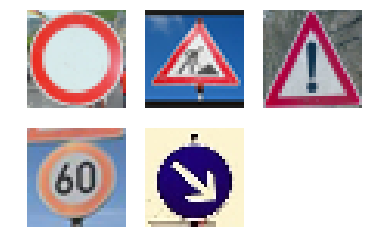

In [28]:
plt.figure()
for x, filename in enumerate(os.listdir("test_images/")):
    img = cv2.imread('test_images/' + filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32), cv2.INTER_LINEAR)
    
    plt.subplot(2, 3, x + 1)
    plt.imshow(img)
    plt.axis('off')

### Predict the Sign Type for Each Image

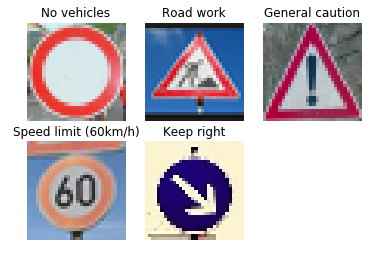

In [29]:
# Make a table of all of the sign classes
table = {}
with open('signnames.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        num, sign = row
        table[num] = sign

for i, filename in enumerate(os.listdir("test_images/")):
    img = cv2.imread('test_images/'+ filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32), cv2.INTER_LINEAR)
    img = img.astype('float32')
    img /= 255
    
    prediction = model.predict(img.reshape(1,32,32,3))
    result=str(np.argmax(prediction))
    
    plt.subplot(2, 3, i+1)
    plt.title(table[result])
    plt.imshow(img)
    plt.axis('off')
    
    
    

### Analyze Performance:

My model achieved 100% accuracy! 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [30]:
for i in range(1,6):
    img = cv2.imread('test_images/' + str(i) + '.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32), cv2.INTER_LINEAR)
    img = img.astype('float32')
    img /= 255
    
    prediction = model.predict(img.reshape(1,32,32,3))
    sess = tf.Session()
    print("Top 5 softmax probabilities for test image " + str(i) + ": \n")
    print(sess.run(tf.nn.top_k(tf.constant(prediction), k=5)))
    print('')


Top 5 softmax probabilities for test image 1: 

TopKV2(values=array([[  1.00000000e+00,   4.12936291e-19,   1.53166673e-24,
          1.31118385e-24,   7.06106007e-27]], dtype=float32), indices=array([[18, 26, 24, 19, 27]], dtype=int32))

Top 5 softmax probabilities for test image 2: 

TopKV2(values=array([[  9.99998450e-01,   1.55828161e-06,   5.03506785e-11,
          1.32642630e-11,   2.56581475e-12]], dtype=float32), indices=array([[15,  4,  7,  5,  1]], dtype=int32))

Top 5 softmax probabilities for test image 3: 

TopKV2(values=array([[  1.00000000e+00,   2.41765538e-13,   1.47972487e-17,
          6.16833066e-21,   1.95697301e-21]], dtype=float32), indices=array([[38,  5,  7, 30, 40]], dtype=int32))

Top 5 softmax probabilities for test image 4: 

TopKV2(values=array([[  1.00000000e+00,   5.02580382e-16,   6.65231619e-17,
          6.08207500e-18,   4.85138410e-18]], dtype=float32), indices=array([[25, 30, 11, 28, 26]], dtype=int32))

Top 5 softmax probabilities for test image 5